In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from alphatims import bruker

In [3]:
df = pd.read_csv("/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_03_02_MCT_scp_hela/alpha_psms.tsv", sep="\t")

In [8]:
dia_pasef_df = df[df["run"] == '20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_AID8_01_S4-E8_1_644']
synchro_pasef_df = df[df["run"] == '20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25wo_01_S4-E2_1_636']

In [10]:
dia_pasef_summary = dia_pasef_df[(dia_pasef_df['qval'] <= 0.01)&(dia_pasef_df['decoy'] == 0)]
synchro_pasef_summary = synchro_pasef_df[(synchro_pasef_df['qval'] <= 0.01)&(synchro_pasef_df['decoy'] == 0)]

dia_pasef_precursors = dia_pasef_summary.groupby('run').agg({'precursor_idx': 'nunique'})
dia_pasef_precursors['method'] = 'diaPASEF'
synchro_pasef_precursors = synchro_pasef_summary.groupby('run').agg({'precursor_idx': 'nunique'})
synchro_pasef_precursors['method'] = 'synchroPASEF'

precursors = pd.concat([dia_pasef_precursors, synchro_pasef_precursors])


In [11]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_14885/500684459.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


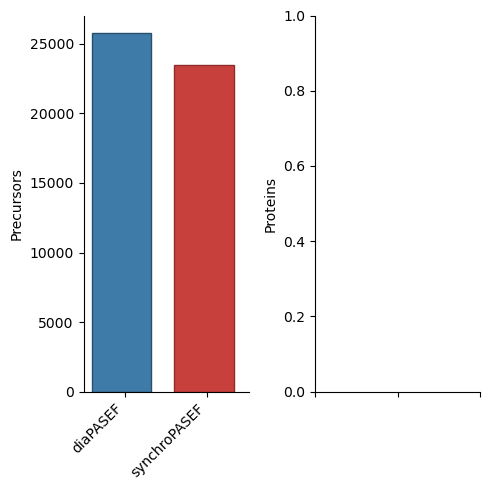

In [12]:
blues = ['#084285', '#2d7dbb', '#3c8bc2', '#539fcd', '#a3cbe2'] 
reds = ['#7d040f','#de2a25', '#e66a6a', '#e98a8a', '#fcd5c2']

fig, axs = plt.subplots(1, 2, figsize=(5, 5))

sns.barplot(precursors, x='method', y='precursor_idx', ax=axs[0], capsize=.4, linewidth=1, edgecolor=".5", errwidth=1, palette=[blues[1], reds[1]])
#sns.barplot(precursors, x='method', y='proteins', ax=axs[1], capsize=.4, linewidth=1, edgecolor=".5", errwidth=1, palette=[blues[1], reds[1]])

axs[0].set_ylabel('Precursors')
axs[1].set_ylabel('Proteins')

axs[0].set_xlabel('')
axs[1].set_xlabel('')

# rotate x labels to 45 degreees
#align right
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xlabel('')

# remove top and righht spine
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for patch in ax.patches:
        clr = patch.get_facecolor()
        patch.set_edgecolor(lighten_color(clr, 1.3))
        w = patch.get_width()
        patch.set_width(w*0.9)

fig.tight_layout()

#fig.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/precursors_proteins.png', dpi=300)


In [13]:
dia_pasef_data = bruker.TimsTOF('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_AID8_01_S4-E8_1_644.d')
synchro_pasef_data = bruker.TimsTOF('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25wo_01_S4-E2_1_636.d')

100%|██████████| 16256/16256 [00:12<00:00, 1306.00it/s]


Text(0.5, 0, 'precursor mz')

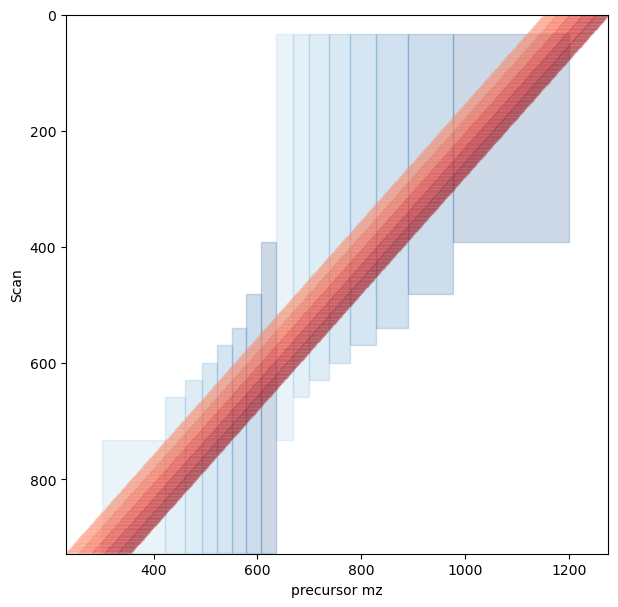

In [14]:
from alphadia.extraction import plotting
fig, ax = plt.subplots(figsize=(7,7))

plotting.plot_dia_cycle(dia_pasef_data.cycle, ax=ax, cmap_name='Blues', alpha=0.2, )
plotting.plot_dia_cycle(synchro_pasef_data.cycle, ax=ax, cmap_name='Reds', alpha=0.2, )

ax.set_xlabel('precursor mz')

#plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/cycle_overlay.png')


In [15]:
from alphadia.extraction.calibration import density_scatter

In [16]:
run_names = synchro_pasef_df['run'].unique()
run_names

array(['20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25wo_01_S4-E2_1_636'],
      dtype=object)

In [ ]:
plot_dia_cycle

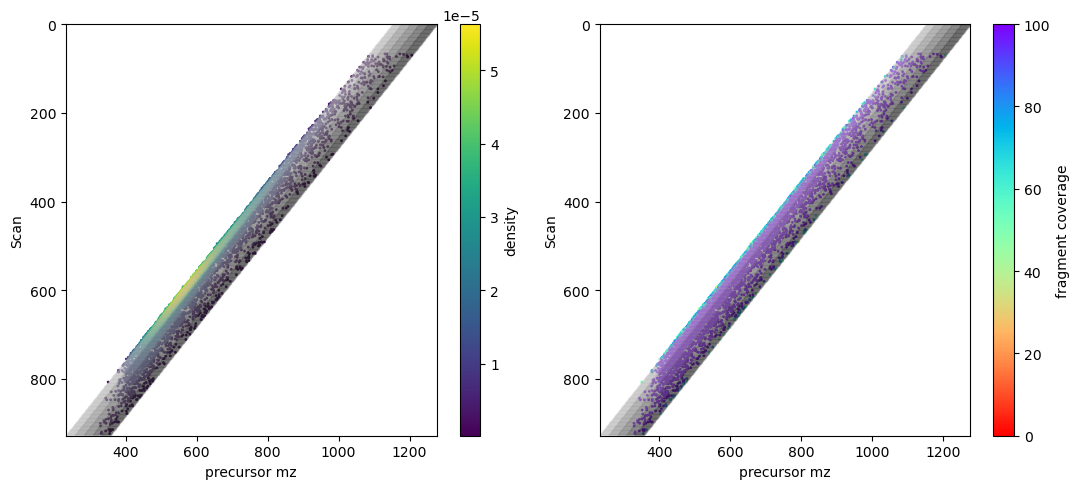

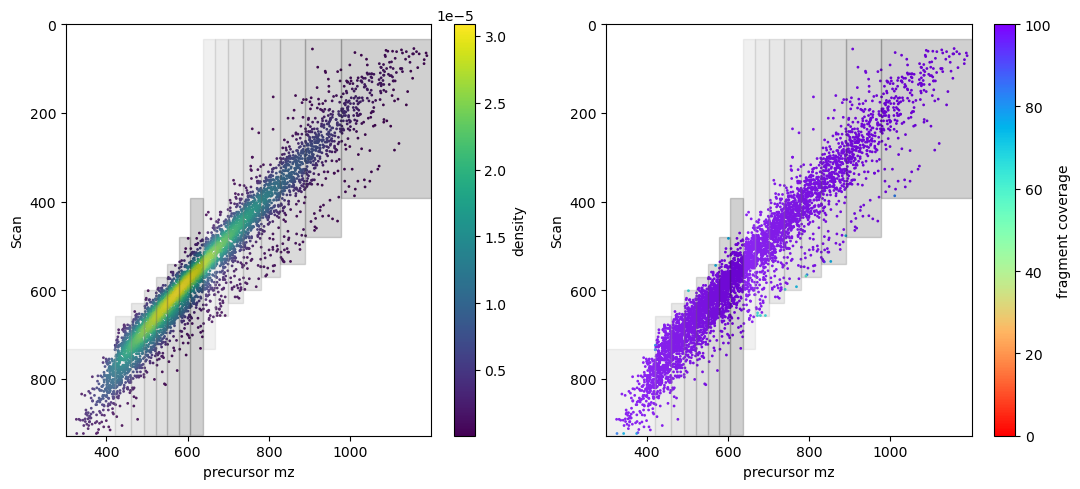

In [17]:
from alphadia.extraction import plotting


for run in synchro_pasef_df['run'].unique():
    df = synchro_pasef_df[synchro_pasef_df['run'] == run].sample(5000)
    
    fig, axs = plt.subplots(1, 2, figsize=(11, 5))
    
    density_scatter(df['mz_observed'].values, len(synchro_pasef_data.mobility_values) - np.searchsorted(synchro_pasef_data.mobility_values[::-1],df['mobility_observed'].values), s=1, axis=axs[0])
    plotting.plot_dia_cycle(synchro_pasef_data.cycle[:,], ax=axs[0], cmap_name='Greys', alpha=0.2, )

    axs[1].scatter(df['mz_observed'].values, len(synchro_pasef_data.mobility_values) - np.searchsorted(synchro_pasef_data.mobility_values[::-1],df['mobility_observed'].values), c=df['fragment_coverage'].values*100, s=1, cmap='rainbow_r', vmin=0.0, vmax=100)
    plotting.plot_dia_cycle(synchro_pasef_data.cycle[:,], ax=axs[1], cmap_name='Greys', alpha=0.2, )
    # show color bar
    fig.colorbar(axs[0].collections[0], ax=axs[0], label='density')
    fig.colorbar(axs[1].collections[0], ax=axs[1], label='fragment coverage')


    axs[0].set_xlabel('precursor mz')
    axs[1].set_xlabel('precursor mz')

    fig.tight_layout()
    #plt.savefig(f'/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/{run}.png')
    plt.show()

for run in dia_pasef_df['run'].unique():
    df = dia_pasef_df[dia_pasef_df['run'] == run].sample(5000)

    fig, axs = plt.subplots(1, 2, figsize=(11, 5))

    density_scatter(df['mz_observed'].values, len(dia_pasef_data.mobility_values) - np.searchsorted(dia_pasef_data.mobility_values[::-1],df['mobility_observed'].values), s=1, axis=axs[0])
    plotting.plot_dia_cycle(dia_pasef_data.cycle[:,], ax=axs[0], cmap_name='Greys', alpha=0.2, )

    axs[1].scatter(df['mz_observed'].values, len(dia_pasef_data.mobility_values) - np.searchsorted(dia_pasef_data.mobility_values[::-1],df['mobility_observed'].values), c=df['fragment_coverage'].values*100, s=1, cmap='rainbow_r', vmin=0.0, vmax=100)
    plotting.plot_dia_cycle(dia_pasef_data.cycle[:,], ax=axs[1], cmap_name='Greys', alpha=0.2, )
    # show color bar
    fig.colorbar(axs[0].collections[0], ax=axs[0], label='density')
    fig.colorbar(axs[1].collections[0], ax=axs[1], label='fragment coverage')


    axs[0].set_xlabel('precursor mz')
    axs[1].set_xlabel('precursor mz')

    fig.tight_layout()
    #plt.savefig(f'/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/{run}.png')
    plt.show()

Text(0.5, 0, 'precursor mz')

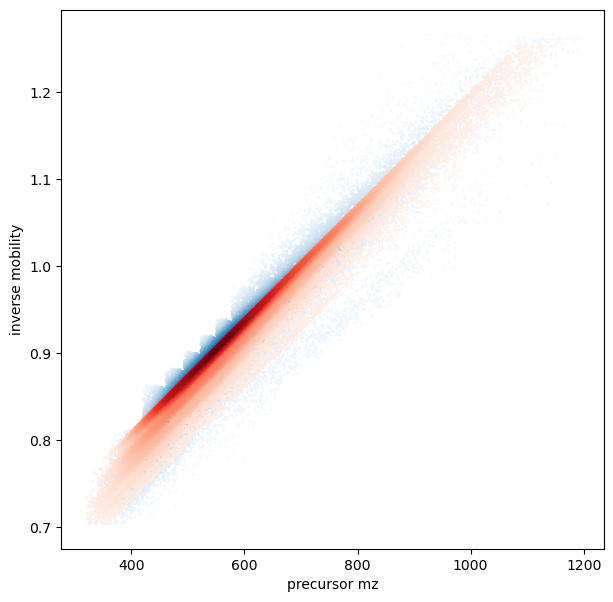

In [27]:
fig, ax = plt.subplots(figsize=(7,7))

run = dia_pasef_df['run'].unique()[0]
df = dia_pasef_df[dia_pasef_df['run'] == run]
df = df[df['qval'] < 0.01]
df = df[df['fragment_coverage'] > 0.5]
density_scatter(df['mz_observed'].values, df['mobility_observed'].values, s=1, axis=ax, cmap='Blues')

run = synchro_pasef_df['run'].unique()[0]
df = synchro_pasef_df[synchro_pasef_df['run'] == run]
df = df[df['qval'] < 0.01]
df = df[df['fragment_coverage'] > 0.5]
density_scatter(df['mz_observed'].values, df['mobility_observed'].values, s=1, axis=ax, cmap='Reds')

ax.set_ylabel('inverse mobility')
ax.set_xlabel('precursor mz')

#plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/density_overlay.png')
   

Text(0.5, 0, 'precursor mz')

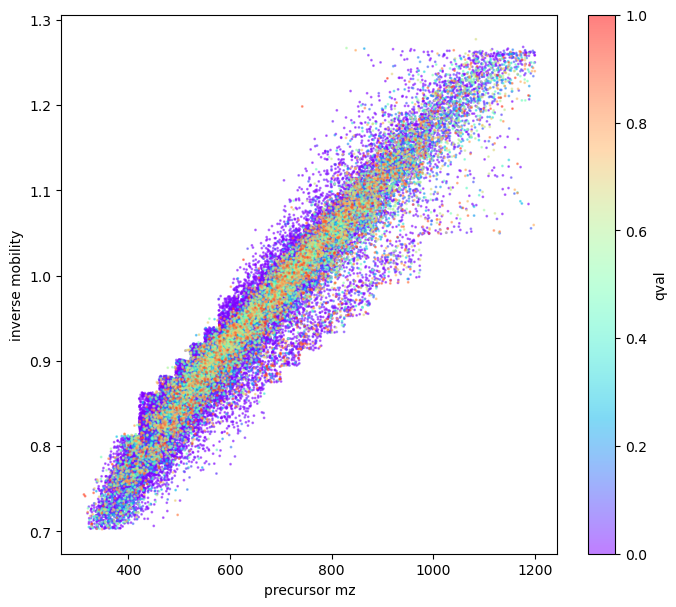

In [18]:
fig, ax = plt.subplots(figsize=(8,7))

run = dia_pasef_df['run'].unique()[0]
df = dia_pasef_df[dia_pasef_df['run'] == run]
df = df[df['decoy'] == 0]
#df = df[df['fragment_coverage'] >]

ax.scatter(df['mz_observed'].values, df['mobility_observed'].values, s=1, c=df['qval'].values, cmap='rainbow', alpha=0.5, vmin=0.0, vmax=1)
fig.colorbar(ax.collections[0], ax=ax, label='qval')

ax.set_ylabel('inverse mobility')
ax.set_xlabel('precursor mz')

#plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/qval_dist_diaPASEF.png')

Text(0.5, 0, 'precursor mz')

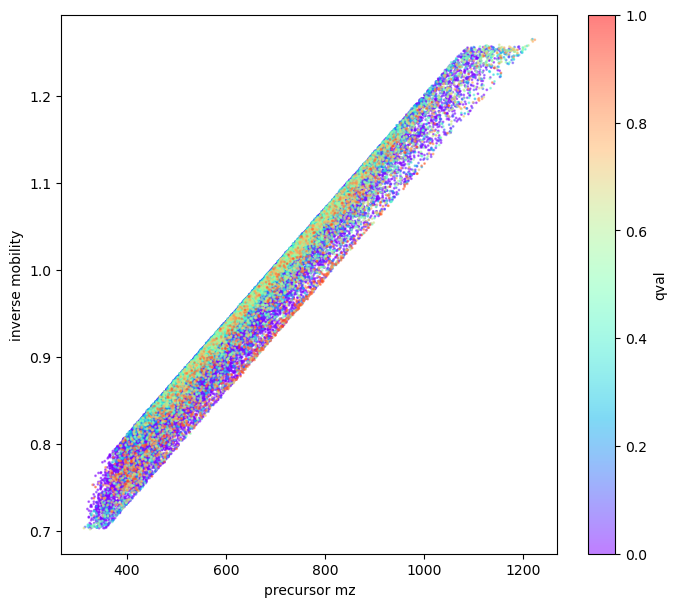

In [19]:
fig, ax = plt.subplots(figsize=(8,7))

run = synchro_pasef_df['run'].unique()[0]
df = synchro_pasef_df[synchro_pasef_df['run'] == run]
df = df[df['decoy'] == 0]

ax.scatter(df['mz_observed'].values, df['mobility_observed'].values, s=1, c=df['qval'].values, cmap='rainbow', alpha=0.5, vmin=0.0, vmax=1)
fig.colorbar(ax.collections[0], ax=ax, label='qval')

ax.set_ylabel('inverse mobility')
ax.set_xlabel('precursor mz')

#plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/qval_dist_synchroPASEF.png')

In [22]:
synchro_pasef_run = synchro_pasef_df['run'].unique()[0]
df = synchro_pasef_df[synchro_pasef_df['run'] == synchro_pasef_run]
df = df[df['decoy'] == 0]
df = df[df['fragment_coverage'] > 0.25]
p_idx = df['precursor_idx'].unique()

len(p_idx)

42867

In [23]:
dia_pasef_run = dia_pasef_df['run'].unique()[0]
synchro_pasef_run = synchro_pasef_df['run'].unique()[0]

dpdf = dia_pasef_df[(dia_pasef_df['run'] == dia_pasef_run) & (dia_pasef_df['precursor_idx'].isin(p_idx))].copy()
dpdf.sort_values('qval', inplace=True)
dpdf['count'] = np.arange(len(dpdf))

#dpdf['method'] = 'dia_pasef'
spdf = synchro_pasef_df[(synchro_pasef_df['run'] == synchro_pasef_run) & (synchro_pasef_df['precursor_idx'].isin(p_idx))].copy()
spdf.sort_values('qval', inplace=True)
spdf['count'] = np.arange(len(spdf))

print(len(dpdf), len(spdf))
#spdf['method'] = 'synchro_pasef'
#combined_df = pd.concat([dpdf, spdf])

42571 42867


In [24]:
spdf

,precursor_idx,elution_group_idx,charge,precursor_mass_error,mz_library,mz_observed,precursor_isotope_correlation,sum_precursor_intensity,n_fragments_matched,n_fragments,...,rt_library,rt_calibrated,rt_error,mobility_library,mobility_calibrated,mobility_error,proba,qval,run,count
87564,3100,3100,3,-0.797088,672.693117,672.704590,0.997784,2.854323,12.0,12.0,...,1503.926249,1607.352842,-4.874205,0.988490,0.969558,0.016864,0.000352,0.000000,20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5...,0
91297,32937,32937,3,-0.804996,386.208495,386.220856,0.999912,3.514055,12.0,12.0,...,907.702168,889.334589,11.738470,0.748348,0.763825,-0.008221,0.001891,0.000000,20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5...,1
91296,30560,30560,2,1.619138,583.800611,583.814148,0.998057,3.014503,12.0,12.0,...,852.225907,819.434942,-0.028997,0.936194,0.925157,0.001782,0.001891,0.000000,20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5...,2
91295,73086,73086,3,0.694017,647.666568,647.679199,0.996083,3.160222,12.0,12.0,...,1098.064448,1146.927409,-1.527873,0.979451,0.961468,0.009437,0.001891,0.000000,20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5...,3
91294,8701,8701,2,-0.545140,832.441074,832.450928,0.995625,2.486081,11.0,12.0,...,1000.479141,1010.611023,-16.203369,1.089954,1.066158,-0.000856,0.001891,0.000000,20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169956,65957,65957,3,-6.331334,702.687203,702.694519,0.493156,2.006376,1.0,11.0,...,561.251827,466.460911,13.233211,0.957856,0.943023,0.025296,0.883872,0.922196,20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5...,42862
169961,34456,34456,3,-11.522366,408.899328,408.907379,0.963925,3.035847,7.0,12.0,...,521.354809,414.088393,-27.728774,0.735639,0.751117,0.027762,0.884172,0.922268,20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5...,42863
169964,8416,8416,2,0.909241,408.726718,408.739838,0.995858,3.409353,1.0,6.0,...,421.751193,300.114665,-5.035106,0.741679,0.757212,0.023607,0.884480,0.922293,20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5...,42864
169970,14051,14051,3,-2.826525,540.306534,540.317810,0.517621,1.836127,1.0,12.0,...,1364.296800,1503.501021,22.799394,0.795453,0.807470,0.025720,0.886710,0.922366,20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5...,42865


Text(0.5, 1.0, '>= 25% Coverage - Precursor IDs')

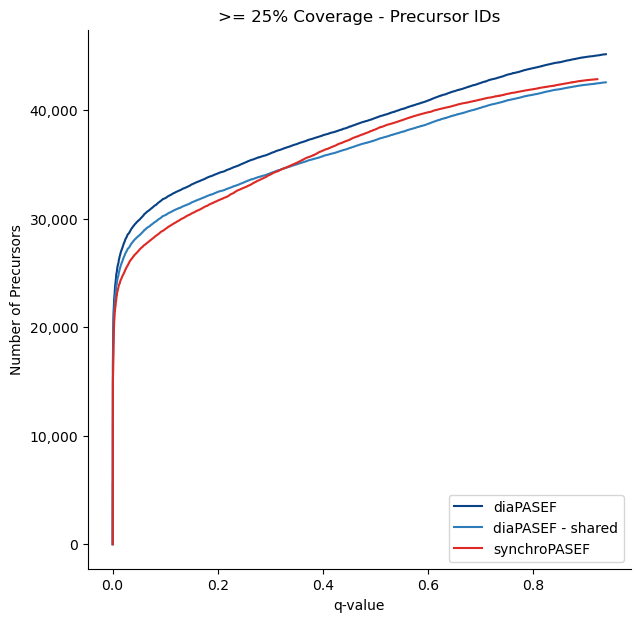

In [25]:
fig, ax = plt.subplots(figsize=(7,7))

all_dia_pasef = dia_pasef_df[(dia_pasef_df['run'] == dia_pasef_run) & (dia_pasef_df['decoy'] == 0)].copy()
all_dia_pasef.sort_values('qval', inplace=True)
all_dia_pasef['count'] = np.arange(len(all_dia_pasef))

plt.plot(all_dia_pasef['qval'].values, all_dia_pasef['count'].values, label='diaPASEF', color='#084285')
plt.plot(dpdf['qval'].values, dpdf['count'].values, label='diaPASEF - shared', color='#2d7dbb')
plt.plot(spdf['qval'].values, spdf['count'].values, label='synchroPASEF', color='#de2a25')

plt.xlabel('q-value')
plt.ylabel('Number of Precursors')

# disable top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# format y axis with thousands separator
import matplotlib.ticker
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#plt.plot([0., 1], [47000, 47000], color='black', linestyle='--', linewidth=1)
plt.legend(loc = 'lower right')

plt.title('>= 25% Coverage - Precursor IDs')
#plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/precursor_ids.png')

Text(0.5, 1.0, 'Precursor IDs and Fragment Coverage')

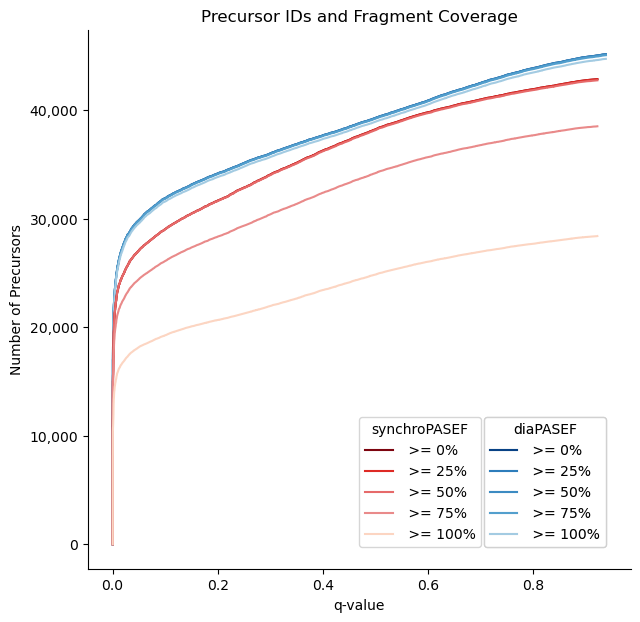

In [26]:
fig, ax = plt.subplots(figsize=(7,7))

d_legend = []

for cutoff, blue, red in zip([0, 0.25, 0.5, 0.75, 1], ['#084285', '#2d7dbb', '#3c8bc2', '#539fcd', '#a3cbe2'], ['#7d040f','#de2a25', '#e66a6a', '#e98a8a', '#fcd5c2']):
    dpdf = dia_pasef_df[(dia_pasef_df['run'] == dia_pasef_run) & (dia_pasef_df['decoy'] == 0)].copy()
    dpdf = dpdf[dpdf['fragment_coverage'] >= cutoff]
    dpdf.sort_values('qval', inplace=True)
    dpdf['count'] = np.arange(len(dpdf))

    line, = ax.plot(dpdf['qval'].values, dpdf['count'].values, label=f'>= {cutoff:.2f}', color=blue)
    
    d_legend += [line]

s_legend = []

for cutoff, blue, red in zip([0, 0.25, 0.5, 0.75, 1], ['#084285', '#2d7dbb', '#3c8bc2', '#539fcd', '#a3cbe2'], ['#7d040f','#de2a25', '#e66a6a', '#e98a8a', '#fcd5c2']):

    spdf = synchro_pasef_df[(synchro_pasef_df['run'] == synchro_pasef_run) & (synchro_pasef_df['decoy'] == 0)].copy()
    spdf = spdf[spdf['fragment_coverage'] >= cutoff]
    spdf.sort_values('qval', inplace=True)
    spdf['count'] = np.arange(len(spdf))

    line, = ax.plot(spdf['qval'].values, spdf['count'].values, label=f'>= {cutoff:.2f}', color=red)

    s_legend += [line]

legend1 = plt.legend(s_legend, [ f' >= {el}%' for el in [0, 25, 50, 75, 100]], loc=(0.50,0.04), title='synchroPASEF')
legend2 = plt.legend(d_legend, [ f' >= {el}%' for el in [0, 25, 50, 75, 100]], loc=(0.73,0.04), title='diaPASEF')

ax.add_artist(legend1)
ax.add_artist(legend2)

plt.xlabel('q-value')
plt.ylabel('Number of Precursors')

# disable top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# format y axis with thousands separator
import matplotlib.ticker
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Precursor IDs and Fragment Coverage')
#plt.savefig('/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/2023_02_13_synchroPasef_vs_diaPasef/precursor_ids_fragment_coverage.png')


In [271]:
dia

NameError: name 'dia' is not defined

In [59]:
df['mobility_observed'].values

array([0.96314657, 1.15129316, 1.11314654, ..., 0.96896553, 0.88362068,
       0.95409483])

In [92]:
synchro_pasef_data.mobility_values

array([1.3       , 1.29935345, 1.2987069 , 1.29806034, 1.29741379,
       1.29676724, 1.29612069, 1.29547414, 1.29482759, 1.29418103,
       1.29353448, 1.29288793, 1.29224138, 1.29159483, 1.29094828,
       1.29030172, 1.28965517, 1.28900862, 1.28836207, 1.28771552,
       1.28706897, 1.28642241, 1.28577586, 1.28512931, 1.28448276,
       1.28383621, 1.28318966, 1.2825431 , 1.28189655, 1.28125   ,
       1.28060345, 1.2799569 , 1.27931034, 1.27866379, 1.27801724,
       1.27737069, 1.27672414, 1.27607759, 1.27543103, 1.27478448,
       1.27413793, 1.27349138, 1.27284483, 1.27219828, 1.27155172,
       1.27090517, 1.27025862, 1.26961207, 1.26896552, 1.26831897,
       1.26767241, 1.26702586, 1.26637931, 1.26573276, 1.26508621,
       1.26443966, 1.2637931 , 1.26314655, 1.2625    , 1.26185345,
       1.2612069 , 1.26056034, 1.25991379, 1.25926724, 1.25862069,
       1.25797414, 1.25732759, 1.25668103, 1.25603448, 1.25538793,
       1.25474138, 1.25409483, 1.25344828, 1.25280172, 1.25215

In [100]:
mz_list = dia_pasef_df['mz_library'].head(10).values
mobility_list = dia_pasef_df['mobility_library'].head(10).values

In [101]:
for mz, mobility in zip(mz_list, mobility_list):
    print(mz, mobility)

666.3171104186533 0.9694406100571762
895.0808291504901 1.010210815682178
816.915026574705 1.0747870734026022
694.880258518185 1.0650131474368956
681.3930017545299 1.0676491705756068
794.909547271105 1.1256728407538863
883.95362042164 1.160553613804536
727.6784180434735 0.9305758054838248
695.0129609864167 1.0035880666499142
697.0094394250734 0.920834714098166
